<a href="https://colab.research.google.com/github/Tarikismail2/Analyse_Bibliom-trique_des_Publications_Scientifiques_avec_l-API_Scopus/blob/main/EDA_Scopus_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [6]:
#import Scraped data
scopus_data = pd.read_csv('/content/sample_data/scopus_publications_multiple_topics_2024-06-17_17-51-44.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [8]:
scopus_data.head()

,Topic,Title,Authors,Publication,Date,Citations,Volume,Issue,Pages,DOI,Abstract
0,artificial intelligence,Perspectives on label-free microscopy of heter...,Pham D.L.,Journal of biomedical optics,2025-12-01,0,29,No issue available,S22702,10.1117/1.JBO.29.S2.S22702,No abstract available
1,artificial intelligence,Autoencoder-based image denoiser suitable for ...,Maghraby M.,Journal of Advanced Research in Applied Scienc...,2025-03-01,0,44,2,234-246,10.37934/araset.44.2.234246,No abstract available
2,artificial intelligence,An Artificial Intelligence Approach to Monitor...,Haron N.H.,Journal of Advanced Research in Applied Scienc...,2025-02-01,0,44,1,105-119,10.37934/araset.44.1.105119,No abstract available
3,artificial intelligence,Efficient and easily recyclable photocatalytic...,Liang Y.,Separation and Purification Technology,2025-01-01,0,352,No issue available,NaN,10.1016/j.seppur.2024.128021,No abstract available
4,artificial intelligence,Modified Levey-Jennings Chart with Robust Esti...,Dahari S.,Journal of Advanced Research in Applied Scienc...,2025-01-01,0,43,2,189-202,10.37934/araset.43.2.189202,No abstract available


## Supprimer les doublons par titre et conserver la première occurrence

In [9]:
scopus_data =scopus_data.drop_duplicates(subset="Title",keep="first")
scopus_data['Date'] = pd.to_datetime(scopus_data['Date'])
scopus_data['Year'] = scopus_data['Date'].dt.year

<ipython-input-9-53d6daeeb59b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_data['Date'] = pd.to_datetime(scopus_data['Date'])
<ipython-input-9-53d6daeeb59b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_data['Year'] = scopus_data['Date'].dt.year


In [10]:
scopus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Topic        473 non-null    object        
 1   Title        473 non-null    object        
 2   Authors      473 non-null    object        
 3   Publication  473 non-null    object        
 4   Date         473 non-null    datetime64[ns]
 5   Citations    473 non-null    int64         
 6   Volume       473 non-null    object        
 7   Issue        473 non-null    object        
 8   Pages        89 non-null     object        
 9   DOI          473 non-null    object        
 10  Abstract     473 non-null    object        
 11  Year         473 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 46.2+ KB


In [11]:
scopus_data[['Citations','Year']].describe()

,Citations,Year
count,473.000000,473.000000
mean,0.069767,2024.169133
std,0.358604,0.375266
min,0.000000,2024.000000
25%,0.000000,2024.000000
50%,0.000000,2024.000000
75%,0.000000,2024.000000
max,4.000000,2025.000000


In [12]:
scopus_data.dtypes

Topic                  object
Title                  object
Authors                object
Publication            object
Date           datetime64[ns]
Citations               int64
Volume                 object
Issue                  object
Pages                  object
DOI                    object
Abstract               object
Year                    int32
dtype: object

## Convertir la colonne 'Date' en datetime pour faciliter l'analyse

In [13]:
scopus_data['Date'] = pd.to_datetime(scopus_data['Date'])
scopus_data.dtypes

Topic                  object
Title                  object
Authors                object
Publication            object
Date           datetime64[ns]
Citations               int64
Volume                 object
Issue                  object
Pages                  object
DOI                    object
Abstract               object
Year                    int32
dtype: object

##  S'assurer que 'Citations' est de type int pour les opérations de somme

In [14]:
scopus_data['Citations'] = pd.to_numeric(scopus_data['Citations']).fillna(0).astype(int)
scopus_data.dtypes

Topic                  object
Title                  object
Authors                object
Publication            object
Date           datetime64[ns]
Citations               int64
Volume                 object
Issue                  object
Pages                  object
DOI                    object
Abstract               object
Year                    int32
dtype: object

## Calculer le nombre total de citations pour chaque Topic

In [15]:
total_citation = scopus_data.groupby("Topic")["Citations"].sum().reset_index()
total_citation.rename(columns={"Citations":"Total Cited"},inplace=True)
total_citation.sort_values(by="Total Cited",ascending=False)

,Topic,Total Cited
17,renewable energy,6
2,autonomous vehicles,5
0,artificial intelligence,4
5,biotechnology,4
13,machine learning,4
14,nanotechnology,3
11,genomics,3
1,augmented reality,1
10,data science,1
8,computer vision,1


##  Analyser la répartition des publications par année

In [16]:
publications_per_year = scopus_data.groupby("Year")["Title"].count().reset_index(name="Publication")
publications_per_year

,Year,Publication
0,2024,393
1,2025,80


## Calculer des statistiques telles que la moyenne, la médiane, le minimum et le maximum des citations pour comprendre l'impact des citations des publications.

In [17]:
citation_statistics = { 'Mean Citations': scopus_data['Citations'].mean(),
    'Median Citations': scopus_data['Citations'].median(),
    'Min Citations': scopus_data['Citations'].min(),
    'Max Citations': scopus_data['Citations'].max() }

print("Statistiques de citations :")
for stat, value in citation_statistics.items():
     print(f"{stat} : {value:.2f}")

Statistiques de citations :
Mean Citations : 0.07
Median Citations : 0.00
Min Citations : 0.00
Max Citations : 4.00


## Identifier les publications avec les citations les plus élevées.

In [18]:
top_publications = scopus_data.sort_values(by="Citations",ascending=False).head(5)
top_publications

,Topic,Title,Authors,Publication,Date,Citations,Volume,Issue,Pages,DOI,Abstract,Year
352,renewable energy,Unveiling the photocatalytic marvels: Recent a...,Askari N.,Journal of Environmental Sciences (China),2025-02-01,4,148,No issue available,283-297,10.1016/j.jes.2024.01.006,No abstract available,2025
38,machine learning,Spatial differentiation of carbon emissions fr...,Cao H.,Journal of Environmental Sciences (China),2025-03-01,3,149,No issue available,358-373,10.1016/j.jes.2023.08.007,No abstract available,2025
402,biotechnology,Hybrid and enhanced electrokinetic system for ...,Hamdi F.M.,Journal of Environmental Sciences (China),2025-01-01,3,147,No issue available,424-450,10.1016/j.jes.2023.11.005,No abstract available,2025
378,nanotechnology,Highly efficient catalytic transfer hydrogenat...,Lu A.,Journal of Environmental Sciences (China),2025-02-01,2,148,No issue available,515-528,10.1016/j.jes.2023.10.010,No abstract available,2025
10,artificial intelligence,Diabetes and its associated factors: A Retrosp...,Amin F.,Pakistan Journal of Medical Sciences,2024-12-05,2,40,2,S10-S14,10.12669/pjms.40.2(ICON).8948,No abstract available,2024


## Analyser la répartition des publications par auteurs. Cela peut aider à comprendre les modèles de collaboration.

In [19]:
publications_per_author = scopus_data.groupby('Authors').size().reset_index(name='Publications')
publications_per_author.sort_values(by="Publications",ascending=False).head(10)

,Authors,Publications
388,Wang Y.,5
228,Li Y.,3
225,Li L.,3
424,Zhang J.,3
430,Zhang Y.,3
213,Laskar M.R.,2
125,Gao Y.,2
153,Han S.,2
385,Wang R.,2
175,Huang S.,2


##  Auteur avec le plus de publications

In [20]:
author_counts = scopus_data['Authors'].value_counts()
(author_counts[author_counts == author_counts.max()]).reset_index(name='Publications')

,Authors,Publications
0,Wang Y.,5


## Revue (Publication) avec le plus  d'articles publiés

In [21]:
journal_counts = scopus_data['Publication'].value_counts()
(journal_counts[journal_counts == journal_counts.max()]).reset_index(name="Articles")
# journal_counts.head(5).reset_index(name="Articles")

,Publication,Articles
0,Scientific Reports,80


## Afficher les 5 revues avec le plus d'articles publiéss

In [22]:
journal_counts_5 = scopus_data["Publication"].value_counts()
journal_counts.head(5).reset_index(name="Articles")

,Publication,Articles
0,Scientific Reports,80
1,Journal of Advanced Research in Applied Scienc...,30
2,Nature Communications,27
3,Journal of Environmental Sciences (China),20
4,Journal of Cloud Computing,15


## Examiner la répartition des publications à travers différents sujets pour voir quels domaines sont les plus étudiés

In [23]:
publications_per_topic = scopus_data.groupby("Topic").size().reset_index(name='Publications')
publications_per_topic

,Topic,Publications
0,artificial intelligence,25
1,augmented reality,25
2,autonomous vehicles,25
3,big data,23
4,bioinformatics,25
5,biotechnology,24
6,blockchain,23
7,cloud computing,25
8,computer vision,23
9,cybersecurity,21


## Analyser comment les publications dans chaque sujet ont évolué au fil des années.

In [24]:
publications_per_topic_year = scopus_data.groupby(['Topic', 'Year']).size().reset_index(name='Publications')
publications_per_topic_year

,Topic,Year,Publications
0,artificial intelligence,2024,18
1,artificial intelligence,2025,7
2,augmented reality,2024,25
3,autonomous vehicles,2024,25
4,big data,2024,19
5,big data,2025,4
6,bioinformatics,2024,24
7,bioinformatics,2025,1
8,biotechnology,2024,20
9,biotechnology,2025,4


## Publications sans résumé (no_abstract)

In [25]:
no_abstract = scopus_data[scopus_data["Abstract"] == "No abstract available"]
print(len(no_abstract))

473


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import itertools
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
sns.set(style="whitegrid")

##1-Number of Publications per Topic

<ipython-input-30-1754ebdae4ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")


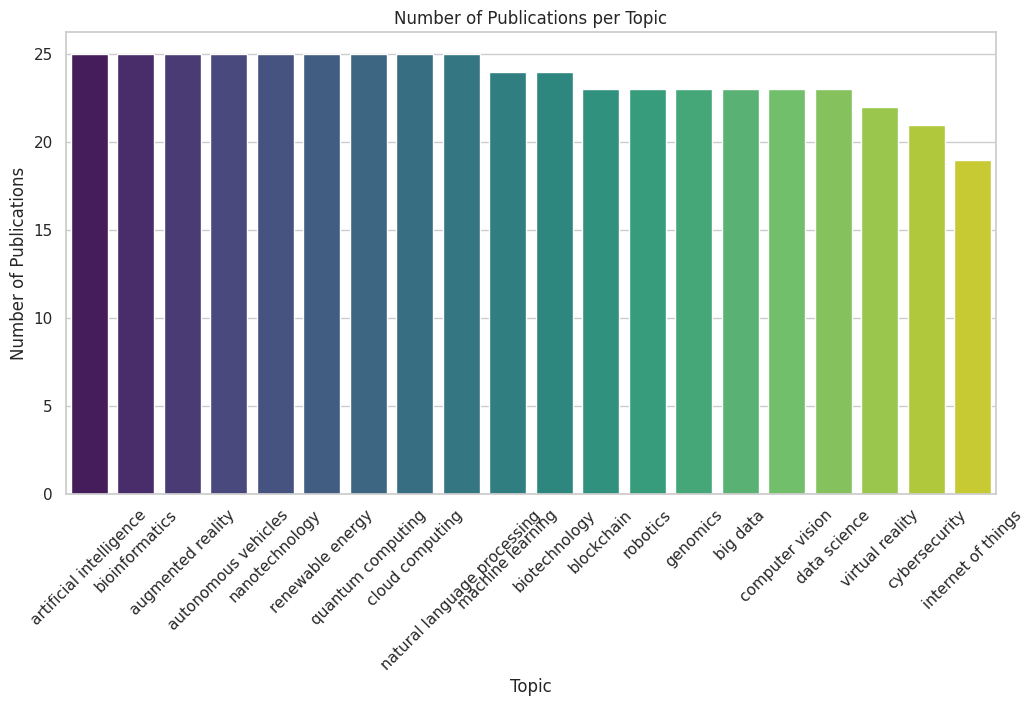

In [30]:
# Set the style for the plots
sns.set(style="whitegrid")

# Count the number of publications per topic
topic_counts = scopus_data['Topic'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.title('Number of Publications per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()

##2-Publication Trend over Time

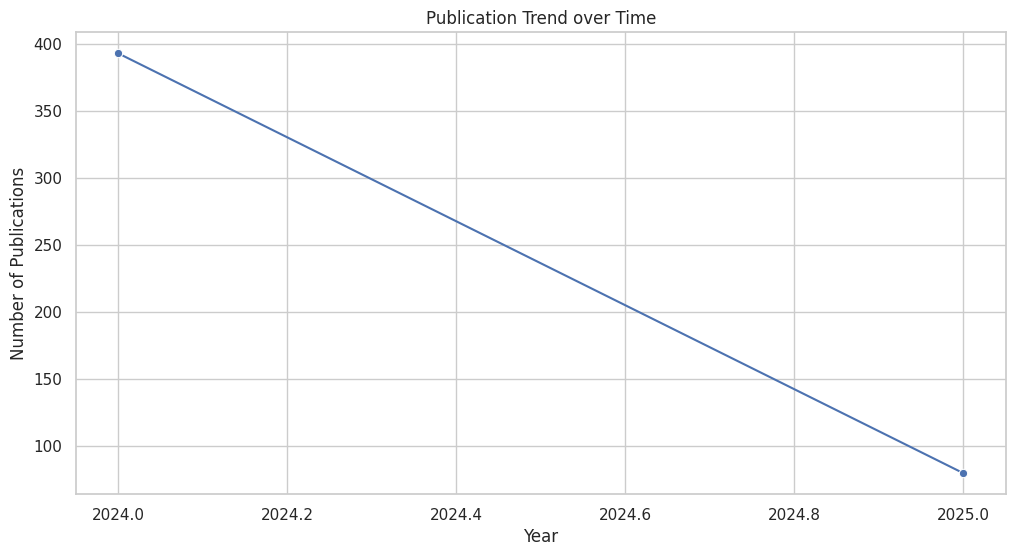

In [31]:
# Convert the Date column to datetime format and extract the year
scopus_data['Date'] = pd.to_datetime(scopus_data['Date'])
scopus_data['Year'] = scopus_data['Date'].dt.year

# Count the number of publications per year
yearly_publications = scopus_data['Year'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_publications.index, y=yearly_publications.values, marker='o')
plt.title('Publication Trend over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

##3-Top Authors by Number of Publications

<ipython-input-32-e4c251cb714c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")


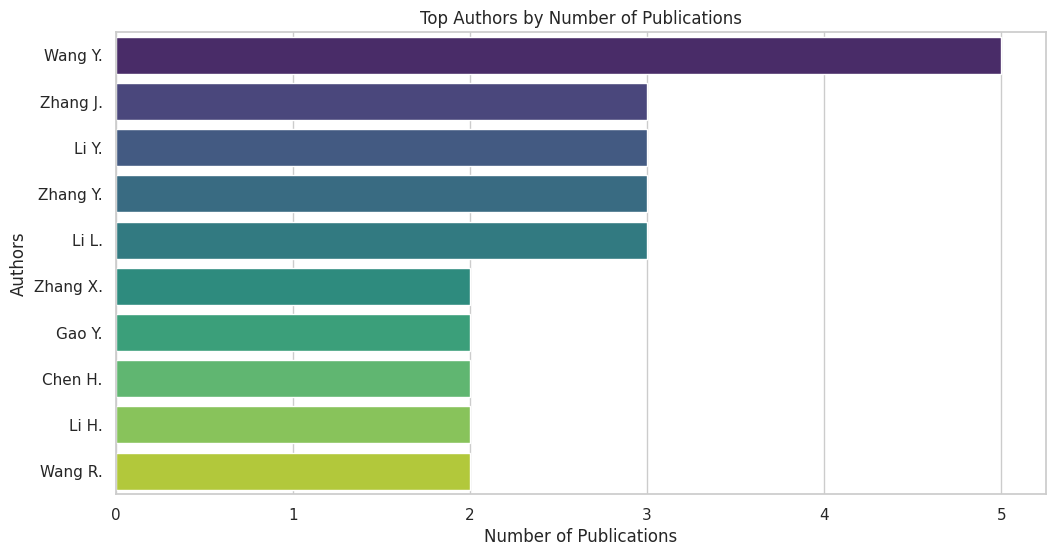

In [32]:
# Count the number of publications per author
author_counts = scopus_data['Authors'].value_counts().head(10)  # Top 10 authors

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")
plt.title('Top Authors by Number of Publications')
plt.xlabel('Number of Publications')
plt.ylabel('Authors')
plt.show()

##4-Citations Distribution

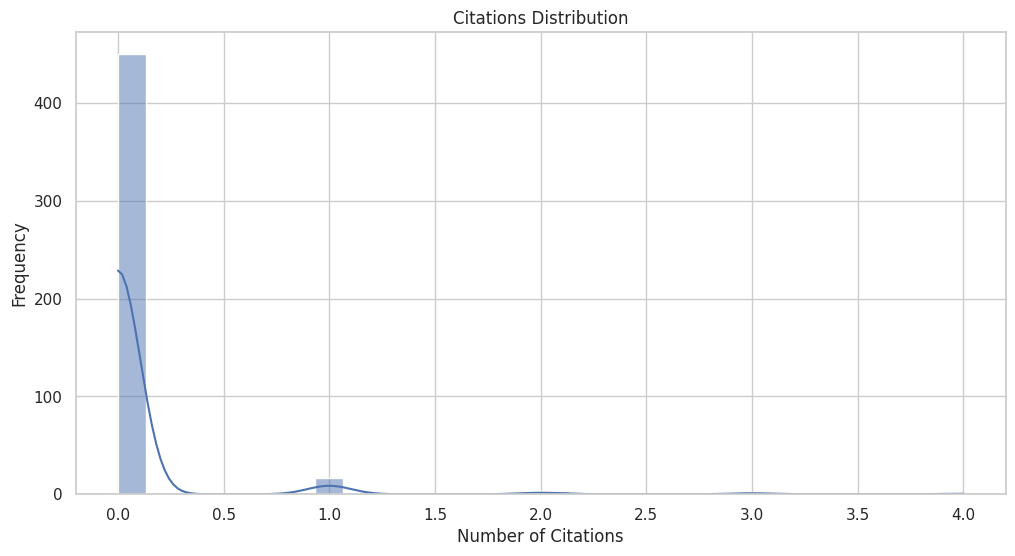

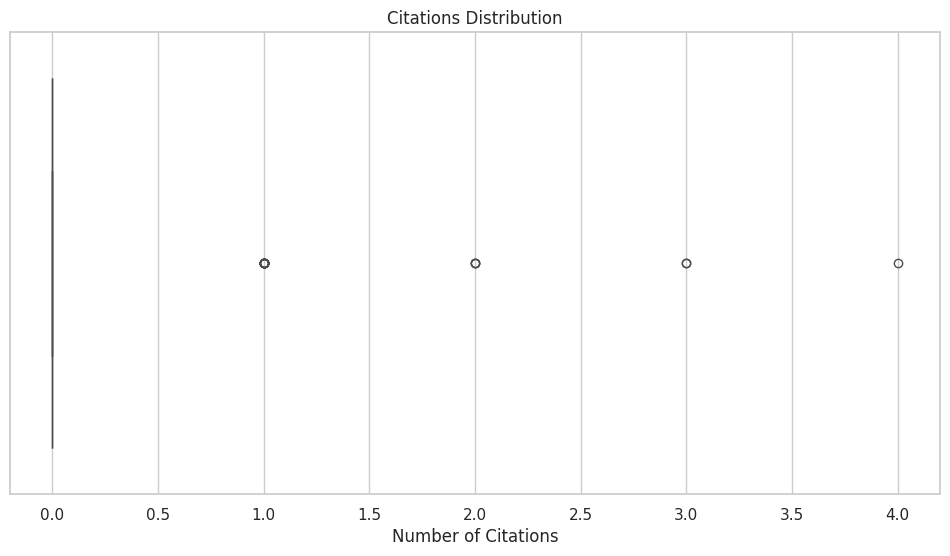

In [33]:
# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(scopus_data['Citations'], bins=30, kde=True)
plt.title('Citations Distribution')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.show()

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=scopus_data['Citations'])
plt.title('Citations Distribution')
plt.xlabel('Number of Citations')
plt.show()

##5-Publications by Journal

<ipython-input-34-972803f585f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=journal_counts.values, y=journal_counts.index, palette="viridis")


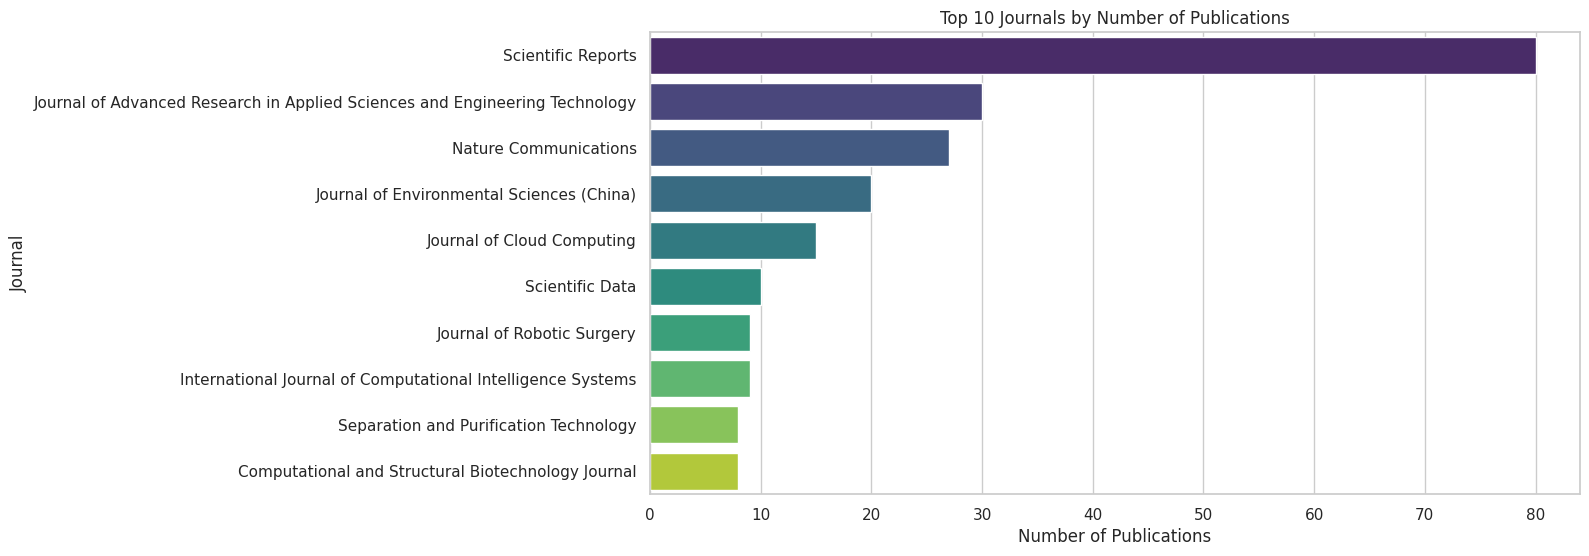

In [34]:
# Count the number of publications per journal
journal_counts = scopus_data['Publication'].value_counts().head(10)  # Top 10 journals

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=journal_counts.values, y=journal_counts.index, palette="viridis")
plt.title('Top 10 Journals by Number of Publications')
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.show()

##6-Publications by Year and Topic

<Figure size 1200x800 with 0 Axes>

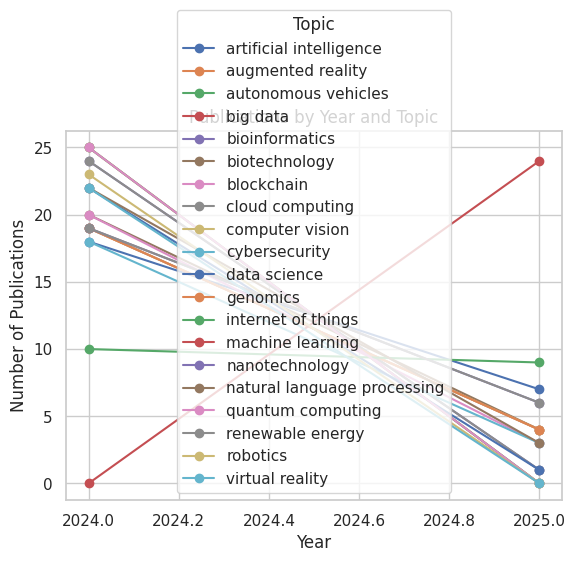

In [35]:
# Create a pivot table with year and topic
year_topic_pivot = scopus_data.pivot_table(index='Year', columns='Topic', aggfunc='size', fill_value=0)

# Create the line plot
plt.figure(figsize=(12, 8))
year_topic_pivot.plot(kind='line', marker='o')
plt.title('Publications by Year and Topic')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend(title='Topic')
plt.show()

##7-Top 10 Articles by Citations

<ipython-input-36-1b96b8b6ad12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cited_articles['Citations'], y=top_cited_articles['Title'], palette="viridis")


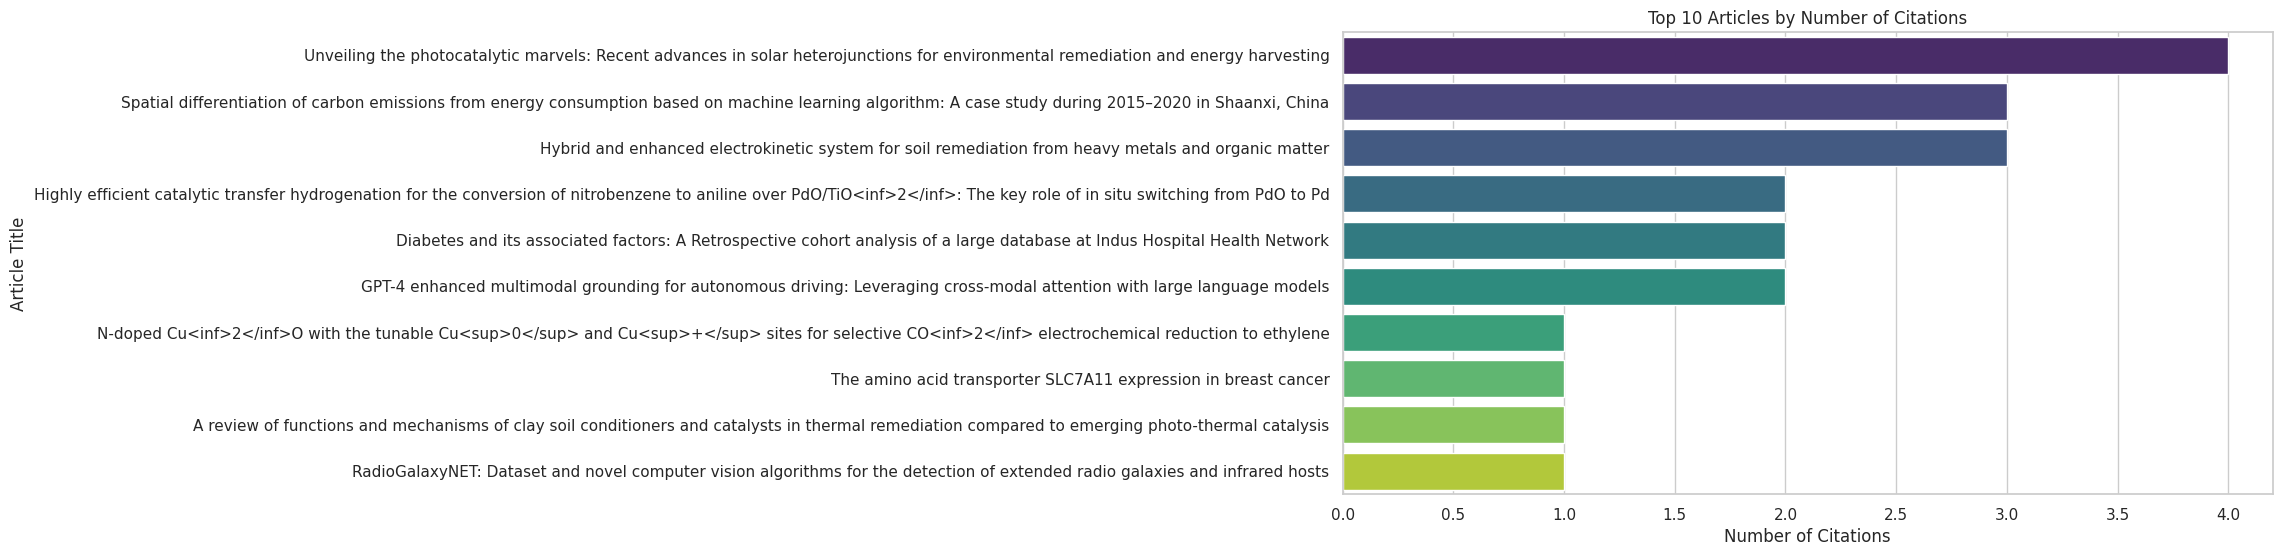

In [36]:
# Sort the dataset by number of citations in descending order and select the top 10 articles
top_cited_articles = scopus_data.sort_values(by='Citations', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cited_articles['Citations'], y=top_cited_articles['Title'], palette="viridis")
plt.title('Top 10 Articles by Number of Citations')
plt.xlabel('Number of Citations')
plt.ylabel('Article Title')
plt.show()

##8-Authors Network (Co-Authorship Analysis)

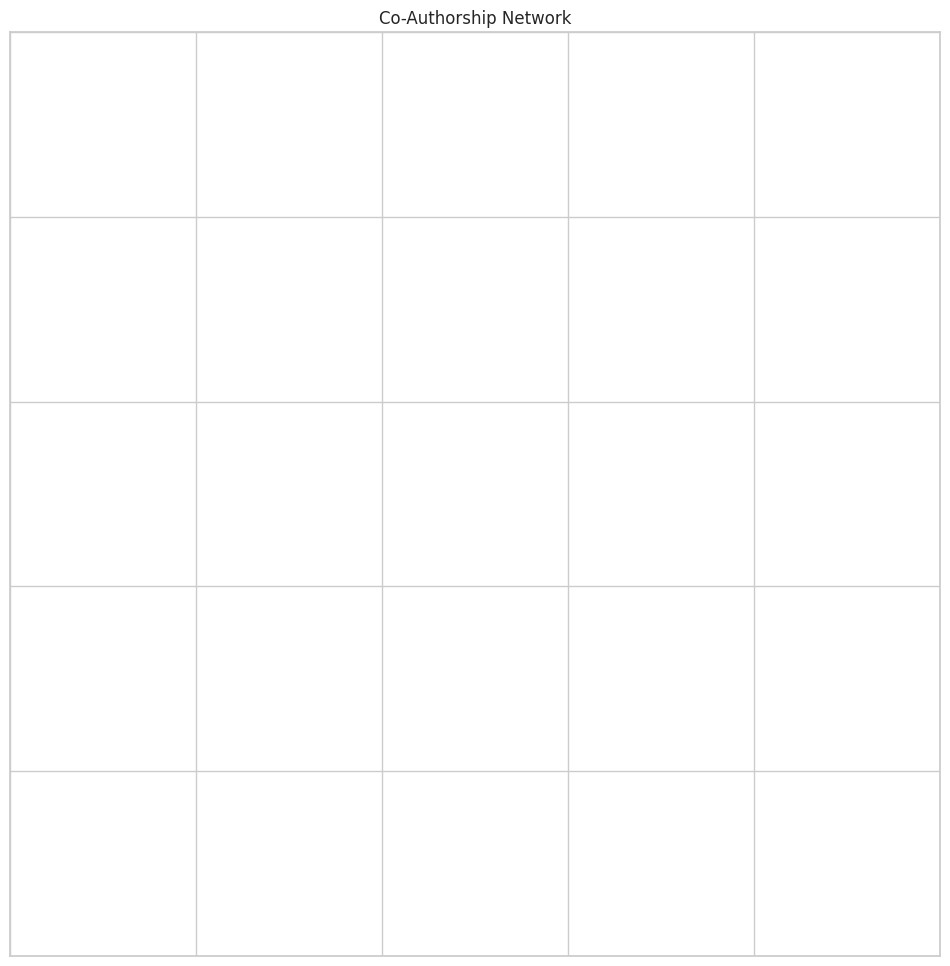

In [40]:
# Create a graph
G = nx.Graph()

# Iterate through each publication and add edges between authors
for authors in scopus_data['Authors']:
    author_list = [author.strip() for author in authors.split(',')]
    for pair in itertools.combinations(author_list, 2):
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Co-Authorship Network')
plt.show()

##9-Word Cloud of Article Titles

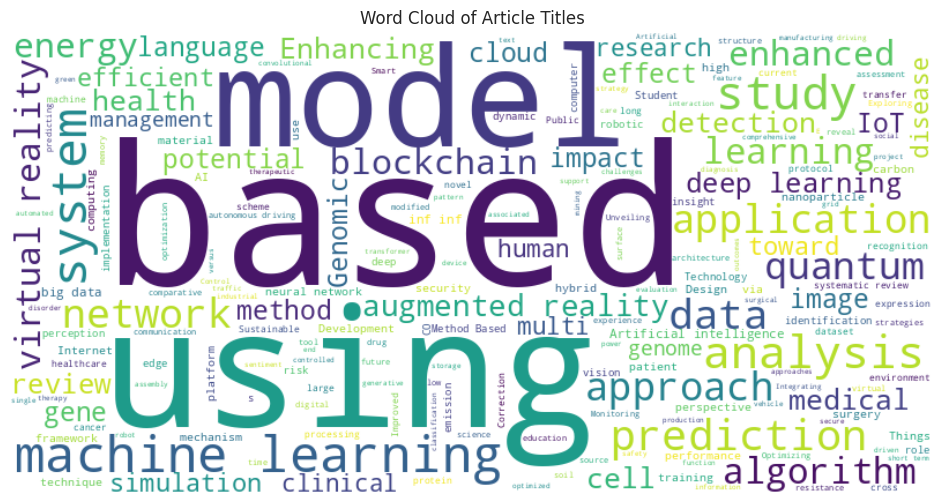

In [42]:
# Combine all titles into a single string
all_titles = ' '.join(scopus_data['Title'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Titles')
plt.show()

##10-Correlation Heatmap of Numerical Features

In [43]:
# Compute the correlation matrix
corr = scopus_data[['Citations', 'Volume']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'No volume available'

##11-Distribution of Publications by Month

<ipython-input-44-4b60398a66db>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_publications.index, y=monthly_publications.values, palette="viridis")


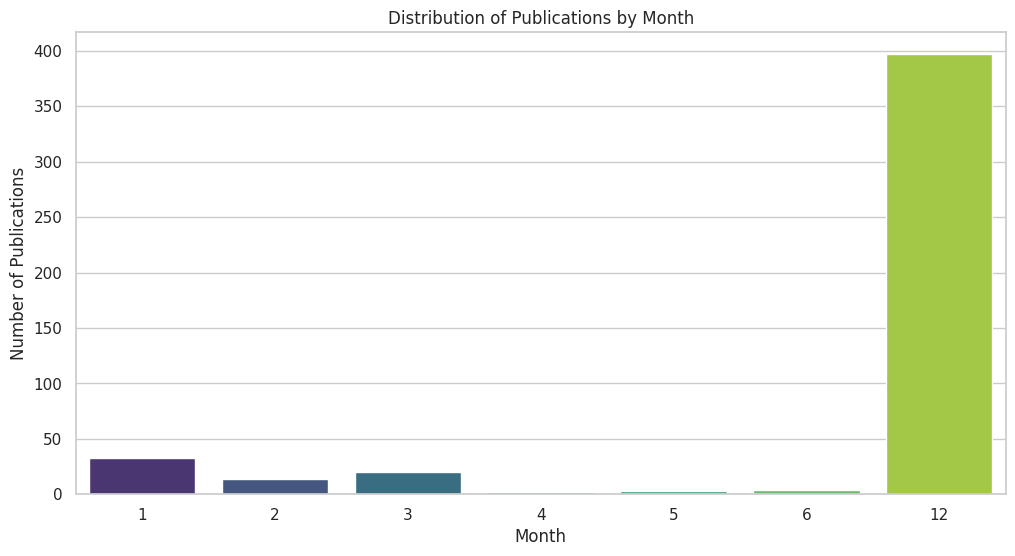

In [44]:
# Extract the month from the Date column
scopus_data['Month'] = scopus_data['Date'].dt.month

# Count the number of publications per month
monthly_publications = scopus_data['Month'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_publications.index, y=monthly_publications.values, palette="viridis")
plt.title('Distribution of Publications by Month')
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.show()

##12-Average Citations per Year

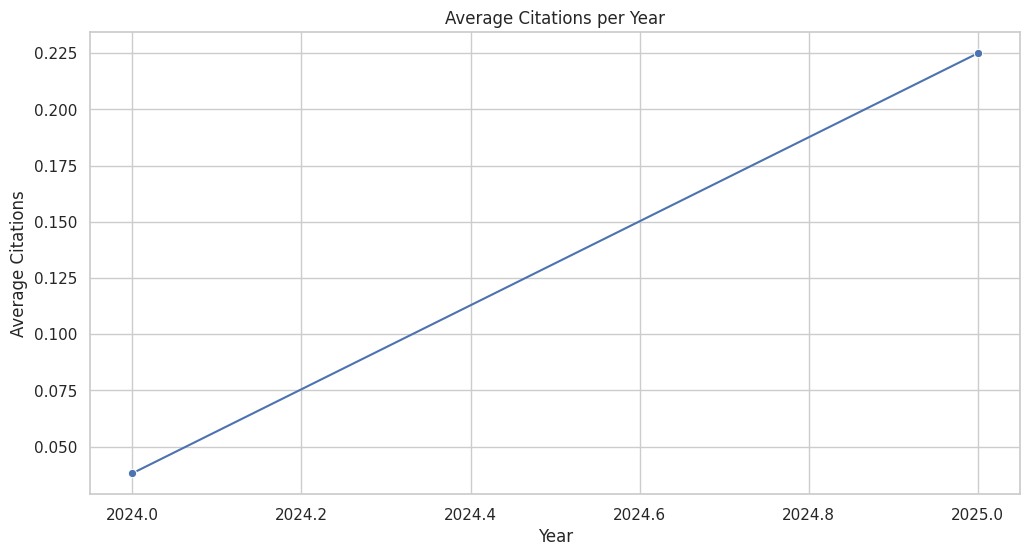

In [45]:
# Calculate the average number of citations per year
avg_citations_per_year = scopus_data.groupby('Year')['Citations'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_citations_per_year.index, y=avg_citations_per_year.values, marker='o')
plt.title('Average Citations per Year')
plt.xlabel('Year')
plt.ylabel('Average Citations')
plt.show()

##13-Top Keywords in Abstracts

<ipython-input-46-131cb652c172>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=keywords, palette="viridis")


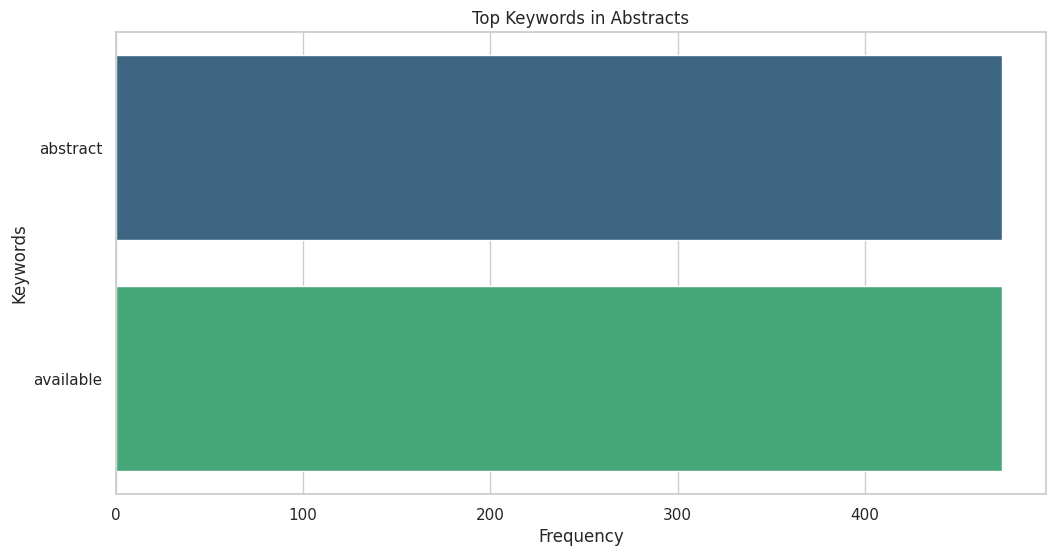

In [46]:
# Combine all abstracts into a single string
all_abstracts = ' '.join(scopus_data['Abstract'].dropna().tolist())

# Use CountVectorizer to find the top keywords
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform([all_abstracts])
keywords = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=keywords, palette="viridis")
plt.title('Top Keywords in Abstracts')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()

##14-Authors Collaboration Heatmap

In [48]:
authors = scopus_data['Authors'].str.split(', ')
author_pairs = authors.explode().reset_index().merge(authors.explode().reset_index(), on='index')
author_pairs = author_pairs[author_pairs['Authors_x'] != author_pairs['Authors_y']]

collab_matrix = defaultdict(int)
for _, row in author_pairs.iterrows():
    collab_matrix[(row['Authors_x'], row['Authors_y'])] += 1

# Convert to a DataFrame
collab_df = pd.DataFrame.from_dict(collab_matrix, orient='index').reset_index()
collab_df.columns = ['Author1', 'Author2', 'Count']
collab_pivot = collab_df.pivot('Author1', 'Author2', 'Count').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(collab_pivot, cmap='viridis', annot=False)
plt.title('Authors Collaboration Heatmap')
plt.show()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements